In [1]:
import numpy as np
import pandas as pd
import time 

In [2]:
meta_data = pd.read_json("bws-short-term-forecasting-main/db-init/data/example_pm_meta.json")

In [3]:
meta_data.head()

,_id,id,date,category,description,address,type
0,urn:ngsi-ld:Device:family-household,urn:ngsi-ld:Device:family-household,2023-05-01 12:44:25.073010,Meter,Smart meter to measure water flow.,"{'addressCountry': 'DE', 'addressLocality': 'B...",Device
1,urn:ngsi-ld:Device:retired-household,urn:ngsi-ld:Device:retired-household,2023-05-01 12:44:25.073010,Meter,Smart meter to measure water flow.,"{'addressCountry': 'DE', 'addressLocality': 'B...",Device
2,urn:ngsi-ld:Device:single-household,urn:ngsi-ld:Device:single-household,2023-05-01 12:44:25.073010,Meter,Smart meter to measure water flow.,"{'addressCountry': 'DE', 'addressLocality': 'B...",Device
3,urn:ngsi-ld:Device:atypical-household,urn:ngsi-ld:Device:atypical-household,2023-05-01 12:44:25.073010,Meter,Smart meter to measure water flow.,"{'addressCountry': 'DE', 'addressLocality': 'B...",Device


In [4]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _id          4 non-null      object        
 1   id           4 non-null      object        
 2   date         4 non-null      datetime64[ns]
 3   category     4 non-null      object        
 4   description  4 non-null      object        
 5   address      4 non-null      object        
 6   type         4 non-null      object        
dtypes: datetime64[ns](1), object(6)
memory usage: 356.0+ bytes


In [5]:
data = pd.read_json("bws-short-term-forecasting-main/db-init/data/example_pm_measurements.json")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70084 entries, 0 to 70083
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           70084 non-null  object 
 1   id            70084 non-null  object 
 2   dateObserved  70084 non-null  object 
 3   refDevice     70084 non-null  object 
 4   numValue      70084 non-null  float64
 5   unit          70084 non-null  object 
 6   type          70084 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.7+ MB


In [7]:
data.head()

,_id,id,dateObserved,refDevice,numValue,unit,type
0,urn:ngsi-ld:Device:family-household:Measuremen...,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T00:00:00,urn:ngsi-ld:Device:family-household,0.413884,MQH,Measurement
1,urn:ngsi-ld:Device:family-household:Measuremen...,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T01:00:00,urn:ngsi-ld:Device:family-household,0.316687,MQH,Measurement
2,urn:ngsi-ld:Device:family-household:Measuremen...,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T02:00:00,urn:ngsi-ld:Device:family-household,0.339165,MQH,Measurement
3,urn:ngsi-ld:Device:family-household:Measuremen...,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T03:00:00,urn:ngsi-ld:Device:family-household,0.630008,MQH,Measurement
4,urn:ngsi-ld:Device:family-household:Measuremen...,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T04:00:00,urn:ngsi-ld:Device:family-household,1.627830,MQH,Measurement


In [8]:
data['refDevice'].value_counts()

refDevice
urn:ngsi-ld:Device:family-household      17521
urn:ngsi-ld:Device:retired-household     17521
urn:ngsi-ld:Device:single-household      17521
urn:ngsi-ld:Device:atypical-household    17521
Name: count, dtype: int64

In [9]:
data.describe()

,numValue
count,70084.000000
mean,1.062959
std,0.868607
min,0.000000
25%,0.390716
50%,0.856563
75%,1.475567
max,4.757478


In [10]:
import matplotlib.pyplot as plt 

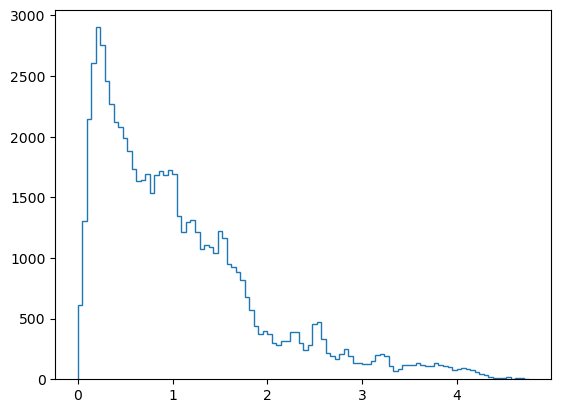

In [11]:
plt.hist(data['numValue'],bins = 100,histtype="step")
plt.show()

In [12]:
data.describe()

,numValue
count,70084.000000
mean,1.062959
std,0.868607
min,0.000000
25%,0.390716
50%,0.856563
75%,1.475567
max,4.757478


In [13]:
data.isna().sum()

_id             0
id              0
dateObserved    0
refDevice       0
numValue        0
unit            0
type            0
dtype: int64

In [14]:
#this file used to train models
csv_data = pd.read_csv("bws-short-term-forecasting-main/flask-backend/app/data/weather/example_precipitation.csv")

In [15]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17522 entries, 0 to 17521
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            17521 non-null  object
 1   precipitation (mm)    17522 non-null  object
 2   precipitation (mm).1  17522 non-null  object
 3   precipitation (mm).2  17522 non-null  object
 4   precipitation (mm).3  17522 non-null  object
dtypes: object(5)
memory usage: 684.6+ KB


In [16]:
csv_data.head()

,Unnamed: 0,precipitation (mm),precipitation (mm).1,precipitation (mm).2,precipitation (mm).3
0,NaN,urn:ngsi-ld:Device:family-household,urn:ngsi-ld:Device:retired-household,urn:ngsi-ld:Device:single-household,urn:ngsi-ld:Device:atypical-household
1,2021-05-26 00:00:00,0.0,0.0,0.0,0.0
2,2021-05-26 01:00:00,0.0,0.0,0.0,0.0
3,2021-05-26 02:00:00,0.0,0.0,0.0,0.0
4,2021-05-26 03:00:00,0.0,0.0,0.0,0.0


In [17]:
csv_data.describe()

,Unnamed: 0,precipitation (mm),precipitation (mm).1,precipitation (mm).2,precipitation (mm).3
count,17521,17522,17522,17522,17522
unique,17521,657,832,890,1012
top,2021-05-26 00:00:00,0.0,0.0,0.0,0.0
freq,1,16866,16691,16633,16511


In [18]:
data.head()

,_id,id,dateObserved,refDevice,numValue,unit,type
0,urn:ngsi-ld:Device:family-household:Measuremen...,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T00:00:00,urn:ngsi-ld:Device:family-household,0.413884,MQH,Measurement
1,urn:ngsi-ld:Device:family-household:Measuremen...,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T01:00:00,urn:ngsi-ld:Device:family-household,0.316687,MQH,Measurement
2,urn:ngsi-ld:Device:family-household:Measuremen...,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T02:00:00,urn:ngsi-ld:Device:family-household,0.339165,MQH,Measurement
3,urn:ngsi-ld:Device:family-household:Measuremen...,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T03:00:00,urn:ngsi-ld:Device:family-household,0.630008,MQH,Measurement
4,urn:ngsi-ld:Device:family-household:Measuremen...,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T04:00:00,urn:ngsi-ld:Device:family-household,1.627830,MQH,Measurement


In [19]:
data['type'].value_counts()

type
Measurement    70084
Name: count, dtype: int64

In [20]:
data.drop(['_id','unit','type'],axis=1,inplace = True)

In [21]:
from prophet import Prophet

In [22]:
data['dateObserved'][[3*(len(data)/4)]]

52563    2021-05-26T00:00:00
Name: dateObserved, dtype: object

In [23]:
data.iloc[52563]["dateObserved"]

'2021-05-26T00:00:00'

In [24]:
df = data

In [25]:
# data['dateObserved'] = pd.to_datetime(data['dateObserved'])  # convert to datetime

# data.rename(columns={'dateObserved': 'ds', 'numValue': 'y'},inplace=True)  # Prophet needs 'ds' and 'y'

# # daily resampling + interpolation
# data = data.reset_index()

In [26]:
data.head()

,id,dateObserved,refDevice,numValue
0,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T00:00:00,urn:ngsi-ld:Device:family-household,0.413884
1,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T01:00:00,urn:ngsi-ld:Device:family-household,0.316687
2,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T02:00:00,urn:ngsi-ld:Device:family-household,0.339165
3,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T03:00:00,urn:ngsi-ld:Device:family-household,0.630008
4,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T04:00:00,urn:ngsi-ld:Device:family-household,1.627830


In [27]:
!pip install xgboost

In [28]:
# df = data

In [34]:
# 3. Train/Test split (last 3 months for testing)
train = data[data['dateObserved'] < data['dateObserved'][52563] ]
test = data[data['dateObserved'] >= data['dateObserved'][52563] ]

In [35]:
df.columns

Index(['id', 'dateObserved', 'refDevice', 'numValue'], dtype='object')

In [36]:
data.head()

,id,dateObserved,refDevice,numValue
0,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T00:00:00,urn:ngsi-ld:Device:family-household,0.413884
1,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T01:00:00,urn:ngsi-ld:Device:family-household,0.316687
2,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T02:00:00,urn:ngsi-ld:Device:family-household,0.339165
3,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T03:00:00,urn:ngsi-ld:Device:family-household,0.630008
4,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T04:00:00,urn:ngsi-ld:Device:family-household,1.627830


In [46]:
train = df.iloc[:-90]
test = df.iloc[-90:]

In [48]:
train.head()

,id,refDevice,numValue,day_of_week,month,day,is_weekend,date,lag_1,lag_2,lag_3,lag_7,lag_14,lag_30
date,,,,,,,,,,,,,,
2021-05-26 07:00:00,52540,3,0.288367,2,5,26,0,2021-05-26 07:00:00,3.786219,1.593113,0.864183,2.989784,1.480329,0.413884
2021-05-26 07:00:00,0,0,0.528804,2,5,26,0,2021-05-26 07:00:00,0.288367,3.786219,1.593113,0.821623,0.737106,0.100989
2021-05-26 08:00:00,17514,1,3.000680,2,5,26,0,2021-05-26 08:00:00,0.528804,0.288367,3.786219,1.660615,1.153247,0.268110
2021-05-26 08:00:00,52541,3,0.257171,2,5,26,0,2021-05-26 08:00:00,3.000680,0.528804,0.288367,3.419064,1.627830,0.441687
2021-05-26 08:00:00,35027,2,1.513051,2,5,26,0,2021-05-26 08:00:00,0.257171,3.000680,0.528804,0.864183,0.909068,0.123076


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# df['date'] = pd.to_datetime(df['dateObserved'])

# df.drop(['dateObserved'],axis=1,inplace=True)

# 2. Set date as index and sort
#df = df.sort_values('date').set_index('date')

# 4. Create time features
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day'] = df.index.day
df['is_weekend'] = (df.index.dayofweek >= 5).astype(int)

# 5. Create lag features
for lag in [1, 2, 3, 7, 14, 30]:
    df[f'lag_{lag}'] = df['numValue'].shift(lag)

# 6. Drop rows with NaNs from lagging
df = df.dropna()

# 7. Encode any categorical columns if needed (e.g., if holiday names or weather conditions exist)
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X_train = train.drop(columns=['numValue'])
y_train = train['numValue']

X_test = test.drop(columns=['numValue'])
y_test = test['numValue']

# 9. Fit model
model = XGBRegressor(n_estimators=50, learning_rate=0.1)
model.fit(X_train, y_train)

# 10. Predict
y_pred = model.predict(X_test)

# 11. Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# 12. Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted")
plt.title("XGBoost Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Water Consumption")
plt.legend()
plt.tight_layout()
plt.show()


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:date: datetime64[ns]

In [39]:
data.head()

,id,dateObserved,refDevice,numValue,date
0,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T00:00:00,urn:ngsi-ld:Device:family-household,0.413884,2021-05-26 00:00:00
1,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T01:00:00,urn:ngsi-ld:Device:family-household,0.316687,2021-05-26 01:00:00
2,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T02:00:00,urn:ngsi-ld:Device:family-household,0.339165,2021-05-26 02:00:00
3,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T03:00:00,urn:ngsi-ld:Device:family-household,0.630008,2021-05-26 03:00:00
4,urn:ngsi-ld:Device:family-household:Measuremen...,2021-05-26T04:00:00,urn:ngsi-ld:Device:family-household,1.627830,2021-05-26 04:00:00


In [ ]:
# 4. Modeling with Prophet
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(train)

ValueError: Dataframe has less than 2 non-NaN rows.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 5. Forecasting
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)

# 6. Plot results
fig1 = model.plot(forecast)
plt.title("Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Water Consumption")
plt.show()

# 7. Evaluation on test set
forecast_test = forecast[['ds', 'yhat']].set_index('ds').loc[test['ds']]
true_test = test.set_index('ds')['y']

mae = mean_absolute_error(true_test, forecast_test['yhat'])
rmse = np.sqrt(mean_squared_error(true_test, forecast_test['yhat']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
